In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Ford
## Texas Data
df_TX_1 = pd.read_csv('Ford_TX.csv')
df_TX_1['state'] = 'TX'
df_TX_2 = pd.read_csv('Ford_TX2.csv')
df_TX_2['state'] = 'TX'
df_TX_3 = pd.read_csv('Toyota_TX.csv')
df_TX_3['state'] = 'TX'
## NY Data
df_NY_1 = pd.read_csv('Ford_NY_1.csv')
df_NY_1['state'] = 'NY'
df_NY_2 = pd.read_csv('Ford_NY_2.csv')
df_NY_2['state'] = 'NY'
## California Data
df_CA_1 = pd.read_csv('Ford_CA.csv')
df_CA_1['state'] = 'CA'

### Merging/Cleaning all data 

In [74]:
df = pd.concat([df_TX_1,df_TX_2,df_TX_3,df_NY_1,df_NY_2,df_CA_1],axis=0).reset_index(drop=True)
df.shape

(2631, 14)

In [75]:
df.drop('Unnamed: 0', axis=1 , inplace=True)
df.head()

,car_mileage,car_price,car_mpg,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state
0,93K miles,"$13,998*",['22/33 mpg'],2015,Fusion Titanium,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX
1,115K miles,"$36,998*",['12/17 mpg'],2015,F250 XLT,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX
2,35K miles,"$20,998*",['19/27 mpg'],2018,Transit Connect XLT,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX
3,7K miles,N/A*,['22/28 mpg'],2017,Escape Titanium,Ford,Black,Automatic,1.5,179.0,4.0,31000.0,TX
4,44K miles,"$25,998*",['18/23 mpg'],2015,F150 XL,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX


In [76]:
#Clean/Convert car_mileage to float number
df["car_mileage"] = df["car_mileage"].str.split("K").str[0].astype('float')*1000

In [77]:
# Clean/Convert car_price to float number
df['car_price'] = df['car_price'].str.replace("$","").str.replace("*","").str.replace(",","").str.replace("N/A",'0').astype('float')
#df_final = df_final[(df_final['car_price'] != 'N/A') | (df_final['car_price'] != 'NaN') | (df_final['car_price'] != np.nan)].astype('float')
df.loc[df['car_price']==0] = np.nan
df.shape

(2631, 13)

In [78]:
# dropping the null columns in car_prices
df = df[pd.notnull(df['car_price'])]
df.shape

(2376, 13)

In [79]:
# Separating the Car model and car make
df[['car_model','Trim']] = df['car_model'].str.split(" ",1,expand=True)

In [80]:
# Clean and separate city/highway MPG
df['car_mpg'] = df['car_mpg'].str.replace("[","").str.replace("'","").str.replace("]","").str.replace(" mpg","").str.replace('nan','0/0')
df[['City_MPG','Highway_MGP']] = df['car_mpg'].str.split("/",expand=True)
df.drop('car_mpg',axis=1,inplace=True)

In [81]:
# Creating two new columns
df['car_age'] = 2021 - df['car_model_year']
df['depreciation'] = df['car_msrp_price']-df['car_price']
df['depreciation_percent'] = 100*df['depreciation']/df['car_msrp_price']

In [82]:
df['car_model_year'] = df['car_model_year'].astype('int')

In [96]:
df

,car_mileage,car_price,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state,Trim,City_MPG,Highway_MGP,car_age,depreciation,depreciation_percent
0,93000.0,13998.0,2015,Fusion,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX,Titanium,22,33,6.0,16802.0,54.551948
1,115000.0,36998.0,2015,F250,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX,XLT,12,17,6.0,1302.0,3.399478
2,35000.0,20998.0,2018,Transit,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX,Connect XLT,19,27,3.0,7002.0,25.007143
4,44000.0,25998.0,2015,F150,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX,XL,18,23,6.0,7602.0,22.625000
5,46000.0,22998.0,2017,Edge,Ford,Silver,Automatic,3.5,280.0,6.0,37600.0,TX,Titanium,17,24,4.0,14602.0,38.835106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,84000.0,13998.0,2018,Escape,Ford,Blue,Automatic,1.5,179.0,NaN,25700.0,CA,SE,23,30,3.0,11702.0,45.533074
2624,7000.0,26998.0,2019,Mustang,Ford,Gray,Automatic,2.3,310.0,4.0,26400.0,CA,Ecoboost Premium,0,0,2.0,-598.0,-2.265152
2628,90000.0,11599.0,2014,Escape,Ford,White,Automatic,2.5,168.0,4.0,23100.0,CA,S,22,31,7.0,11501.0,49.787879
2629,42000.0,13998.0,2015,Escape,Ford,White,Automatic,2.5,168.0,4.0,23500.0,CA,S,22,31,6.0,9502.0,40.434043


In [84]:
df.car_model_year.value_counts()

2017    494
2018    458
2019    346
2016    257
2015    201
2014    175
2013    156
2020    137
2012     67
2011     46
2010     27
2009     12
Name: car_model_year, dtype: int64

In [86]:
# Filtering the data based on dates after 2012
print(df.shape)
df = df[df['car_model_year']>2012]
print(df.shape)

(2376, 18)
(2224, 18)


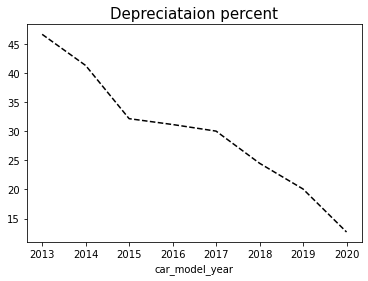

In [87]:
ax = df.groupby('car_model_year').depreciation_percent.mean().plot(c='k',ls='--');
ax.set_title('Depreciataion percent',size=15,c='k');

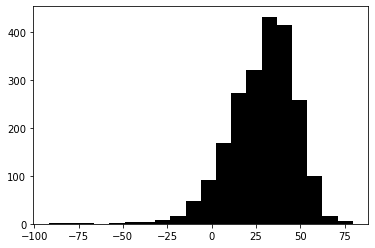

In [88]:
df['depreciation_percent'].hist(grid=False,color='k',bins=20);

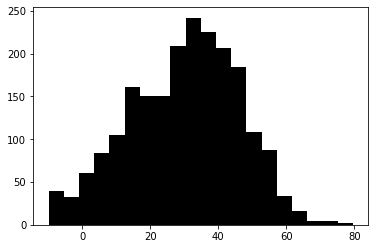

In [97]:
# Removing the data with depreciation less than -10
df = df[df['depreciation_percent']>-10]
df['depreciation_percent'].hist(grid=False,color='k',bins=20);

In [28]:
df[df.depreciation<0].car_model.value_counts()

F150       63
Tacoma     23
F250       19
Mustang    11
Ranger      9
Tundra      9
4Runner     7
F350        2
Camry       1
Name: car_model, dtype: int64

In [29]:
df.car_model_year.value_counts().sort_index()

2013    156
2014    175
2015    201
2016    257
2017    494
2018    458
2019    346
2020    137
Name: car_model_year, dtype: int64

AttributeError: 'PathCollection' object has no property 'markerfacecolor'

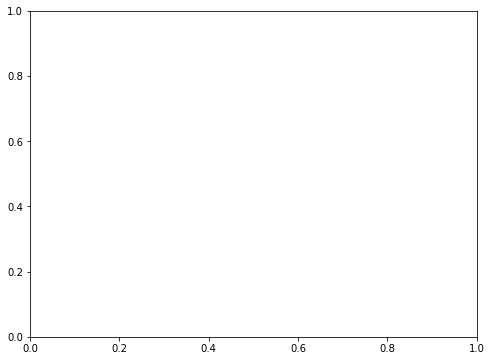

In [100]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(x=df.car_mileage,y=df.depreciation_percent,alpha=0.5,c='k',marker='o',markerfacecolor='red');
ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);